In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
import os
import torchvision


In [ ]:
data_transforms={
    'train':transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])

    ]),
    'test':transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
    ])

}

In [ ]:
import os

# Check the files and folders in the Drive
!ls '/content/drive/My Drive/'




'190121 (1).pdf'				        PetImages.rar
'190121 (2).pdf'				        PetImages.zip
 190121.jpg					        Portfolio.gsite
 190121.pdf					       'python assignment_1.gdoc'
'AdmitCard_JFUNSAKPKY (1).pdf'			        Resume
'Adobe Scan 3 Aug, 2024.pdf'			        Resume.gdoc
'archive (9).zip'				        Sharer.pw
'assignment 2.gdoc'				        signature.pdf
 book						       'Synthetic Pathway of Glycoside.pdf'
'brain tumor dataset'				       'tanzil (1).jpg'
 Classroom					        tanzil.jpg
'Colab Notebooks'				       'university list.gsheet'
 computer_programming.pdf			        Untitled0.ipynb
 DBMS						       'Untitled Diagram (1).drawio'
 extracted_data					       'Untitled Diagram (2).drawio'
 extracted_files_temp				       'Untitled Diagram.drawio'
 GAN1						       'Untitled document.gdoc'
'Getting started.pdf'				       'Untitled folder'
 inbound5364363717564617440.jpg			       'Untitled folder (1)'
 inbound7171479160628847508.jpg			       'Untitled map.gmap'
 Lehninger-principle

In [ ]:
data_dir = '/content/drive/My Drive/brain tumor dataset'

In [ ]:
train_dir = os.path.join(data_dir, 'Training')
test_dir = os.path.join(data_dir, 'Testing')

In [ ]:
train_dataset=datasets.ImageFolder(train_dir,transform=data_transforms['train'])
test_dataset=datasets.ImageFolder(test_dir,transform=data_transforms['test'])


In [ ]:
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False)

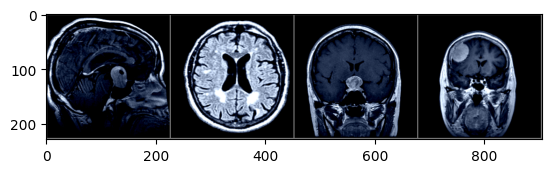

Labels: pituitary notumor pituitary meningioma


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
  img=img/2+0.5
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

dataiter=iter(train_loader)
images,labels=next(dataiter)
imshow(torchvision.utils.make_grid(images[:4]))

print('Labels:',' '.join(f"{train_dataset.classes[labels[j]]}" for j in range(4)))


In [ ]:
class CustomCNN(nn.Module):
  def __init__(self):
    super(CustomCNN,self).__init__()
    self.conv1=nn.Conv2d(3,32,kernel_size=3,padding=1)
    self.conv2=nn.Conv2d(32,64,kernel_size=3,padding=1)
    self.conv3=nn.Conv2d(64,128,kernel_size=3,padding=1)
    self.pool=nn.MaxPool2d(2,2)
    self.fc1=nn.Linear(128*28*28,512)
    self.fc2=nn.Linear(512,128)
    self.fc3=nn.Linear(128,4)

  # Indent the forward function within the class definition
  def forward(self,x):
    x=self.pool(torch.relu(self.conv1(x)))
    x=self.pool(torch.relu(self.conv2(x)))
    x=self.pool(torch.relu(self.conv3(x)))
    x=x.view(-1,128*28*28)
    x=torch.relu(self.fc1(x))
    x=torch.relu(self.fc2(x))
    x=self.fc3(x)
    return x


model=CustomCNN()
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=model.to(device)

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [ ]:
def train_model(model, criterion, optimizer, train_loader, num_epochs=10):
    model.to(device)
    model.train()

    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        batches_per_part = len(train_loader)

        for i, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            if (i + 1) % batches_per_part == 0 or (i + 1) == len(train_loader):
                part_loss = running_loss / (i + 1)
                part_accuracy = 100 * correct / total
                print(f"Epoch [{epoch + 1}/{num_epochs}], Part [{(i + 1) // batches_per_part + 1}/10], "
                      f"Loss: {part_loss:.4f}, Accuracy: {part_accuracy:.2f}%")

        epoch_loss = running_loss / len(train_loader)
        accuracy = 100 * correct / total
        print(f"Epoch [{epoch + 1}/{num_epochs}] Completed, Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%")

train_model(model, criterion, optimizer, train_loader, num_epochs=10)


Epoch [1/10], Part [2/10], Loss: 0.6445, Accuracy: 74.08%
Epoch [1/10], Part [3/10], Loss: 0.6033, Accuracy: 76.56%
Epoch [1/10], Part [4/10], Loss: 0.5772, Accuracy: 77.02%
Epoch [1/10], Part [5/10], Loss: 0.5837, Accuracy: 77.30%
Epoch [1/10], Part [6/10], Loss: 0.5637, Accuracy: 77.76%
Epoch [1/10], Part [7/10], Loss: 0.5412, Accuracy: 78.92%
Epoch [1/10], Part [8/10], Loss: 0.5364, Accuracy: 79.04%
Epoch [1/10], Part [9/10], Loss: 0.5283, Accuracy: 79.53%
Epoch [1/10], Part [10/10], Loss: 0.5213, Accuracy: 79.58%
Epoch [1/10], Part [11/10], Loss: 0.5056, Accuracy: 80.40%
Epoch [1/10], Part [11/10], Loss: 0.5014, Accuracy: 80.60%
Epoch [1/10] Completed, Loss: 0.5014, Accuracy: 80.60%
Epoch [2/10], Part [2/10], Loss: 0.3551, Accuracy: 87.68%
Epoch [2/10], Part [3/10], Loss: 0.3349, Accuracy: 86.95%
Epoch [2/10], Part [4/10], Loss: 0.3267, Accuracy: 87.62%
Epoch [2/10], Part [5/10], Loss: 0.3216, Accuracy: 87.78%
Epoch [2/10], Part [6/10], Loss: 0.3120, Accuracy: 87.72%
Epoch [2/10], 

In [ ]:
def evaluate_model(model,test_loader):
  model.eval()
  correct=0
  total=0
  with torch.no_grad():
    for inputs,labels in test_loader:
      inputs=inputs.to(device)
      labels=labels.to(device)
      outputs=model(inputs)
      _,predicted=torch.max(outputs,1)
      total+=labels.size(0)
      correct+=(labels==predicted).sum().item()
  accuracy=100*correct/total
  print(f'Test Accuracy: {accuracy:.2f}%')

evaluate_model(model,test_loader)